In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
import seaborn as sns
import ccxt
import matplotlib.dates as mdates


Continuemos el analisis de las monedas, para ello se tomara otros los Recursos digitales pruebas:
Tether
BNB

# *Precio Actual
# *Capitalizacion de Mercado

In [ ]:
# Obtener datos de Tether (USDT) y Dogecoin (DOGE) desde la API
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "ids": "tether,dogecoin",  # Seleccionamos USDT y DOGE
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
}

response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Visualizar las primeras filas del DataFrame
print(df.head())


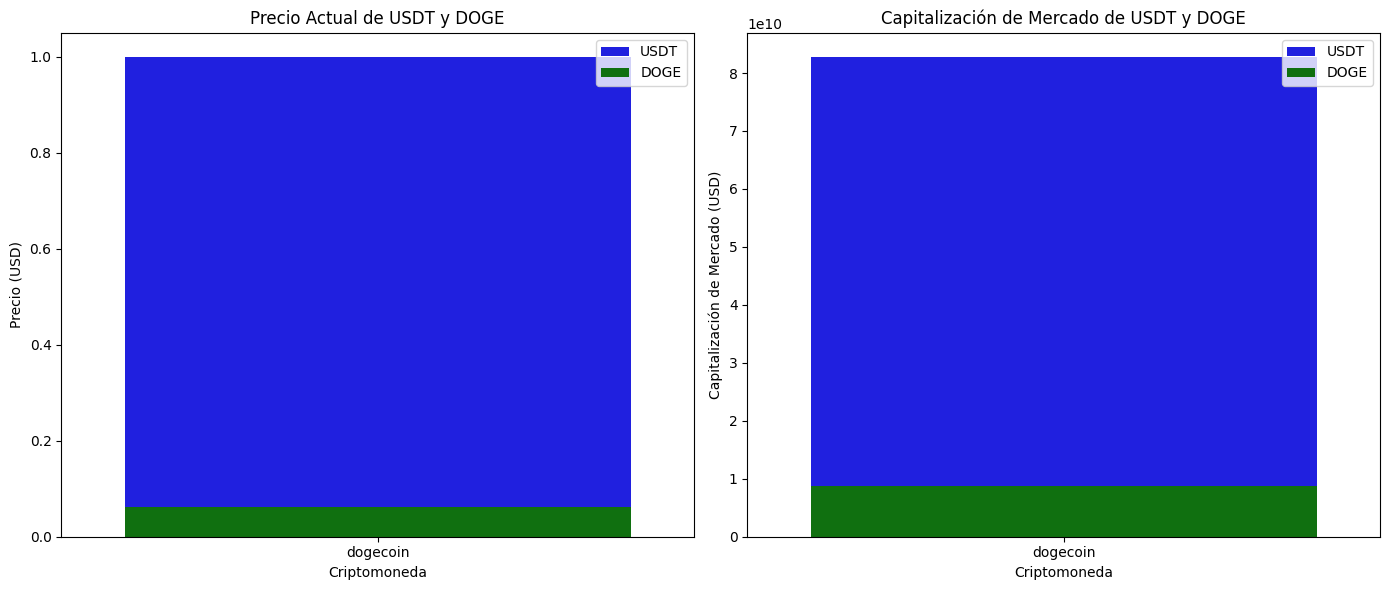

In [6]:
# Filtrar los datos para tether (USDT) y dogecoin (DOGE)
thr_data = df[df['id'] == 'tether']
dog_data = df[df['id'] == 'dogecoin']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de barras para el precio actual
sns.barplot(x='id', y='current_price', data=thr_data, ax=axes[0], color='blue', label='USDT')
sns.barplot(x='id', y='current_price', data=dog_data, ax=axes[0], color='green', label='DOGE')
axes[0].set_title('Precio Actual de USDT y DOGE')
axes[0].set_ylabel('Precio (USD)')
axes[0].set_xlabel('Criptomoneda')

# Gráfico de barras para la capitalización de mercado
sns.barplot(x='id', y='market_cap', data=thr_data, ax=axes[1], color='blue', label='USDT')
sns.barplot(x='id', y='market_cap', data=dog_data, ax=axes[1], color='green', label='DOGE')
axes[1].set_title('Capitalización de Mercado de USDT y DOGE')
axes[1].set_ylabel('Capitalización de Mercado (USD)')
axes[1].set_xlabel('Criptomoneda')

# Mostrar los gráficos
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()


### Analisis anterior en $ Argentino

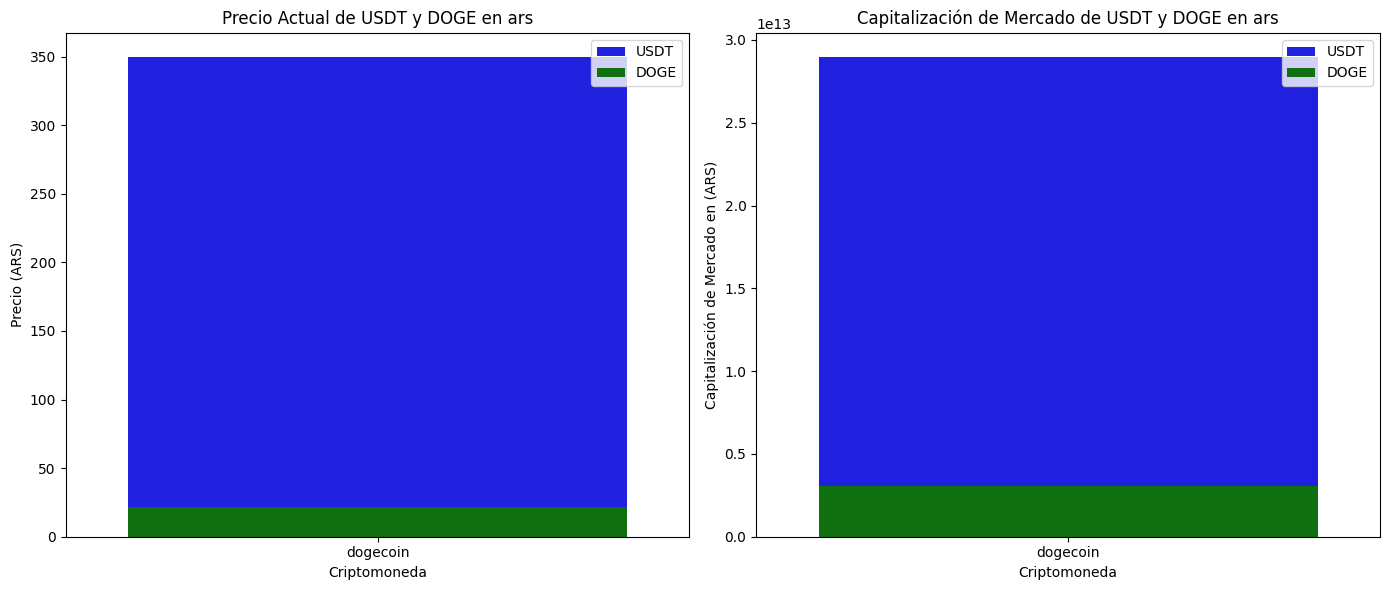

In [7]:
# Obtener datos de Tether (USDT) y Dogecoin (DOGE) desde la API
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "ars",
    "ids": "tether,dogecoin",  # Seleccionamos USDT y DOGE
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
}

response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Visualizar las primeras filas del DataFrame
#print(df.head())

# Filtrar los datos para tether (USDT) y dogecoin (DOGE)
thr_data = df[df['id'] == 'tether']
dog_data = df[df['id'] == 'dogecoin']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de barras para el precio actual
sns.barplot(x='id', y='current_price', data=thr_data, ax=axes[0], color='blue', label='USDT')
sns.barplot(x='id', y='current_price', data=dog_data, ax=axes[0], color='green', label='DOGE')
axes[0].set_title('Precio Actual de USDT y DOGE en ars')
axes[0].set_ylabel('Precio (ARS)')
axes[0].set_xlabel('Criptomoneda')

# Gráfico de barras para la capitalización de mercado
sns.barplot(x='id', y='market_cap', data=thr_data, ax=axes[1], color='blue', label='USDT')
sns.barplot(x='id', y='market_cap', data=dog_data, ax=axes[1], color='green', label='DOGE')
axes[1].set_title('Capitalización de Mercado de USDT y DOGE en ars')
axes[1].set_ylabel('Capitalización de Mercado en (ARS)')
axes[1].set_xlabel('Criptomoneda')

# Mostrar los gráficos
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

# *Volumnen de operaciones
# *Cambios recientes

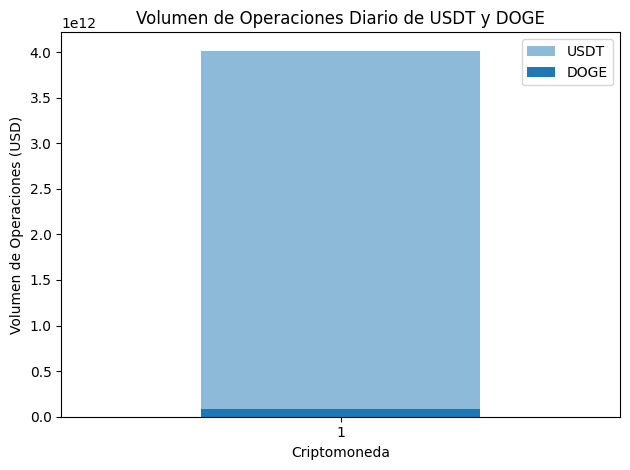

In [8]:
import matplotlib.pyplot as plt

# Filtrar datos de volumen diario para Tether (USDT) y Dogecoin (DOGE)
volumen_btc = df[df['id'] == 'tether']['total_volume']
volumen_eth = df[df['id'] == 'dogecoin']['total_volume']

# Crear el gráfico de barras
fig, ax = plt.subplots()
volumen_btc.plot(kind='bar', x='name', y='total_volume', ax=ax, label='USDT', alpha=0.5)
volumen_eth.plot(kind='bar', x='name', y='total_volume', ax=ax, label='DOGE', alpha=1)
ax.set_xlabel('Criptomoneda')
ax.set_ylabel('Volumen de Operaciones (USD)')
ax.set_title('Volumen de Operaciones Diario de USDT y DOGE')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

##### Cambios Recientes en el Precio:

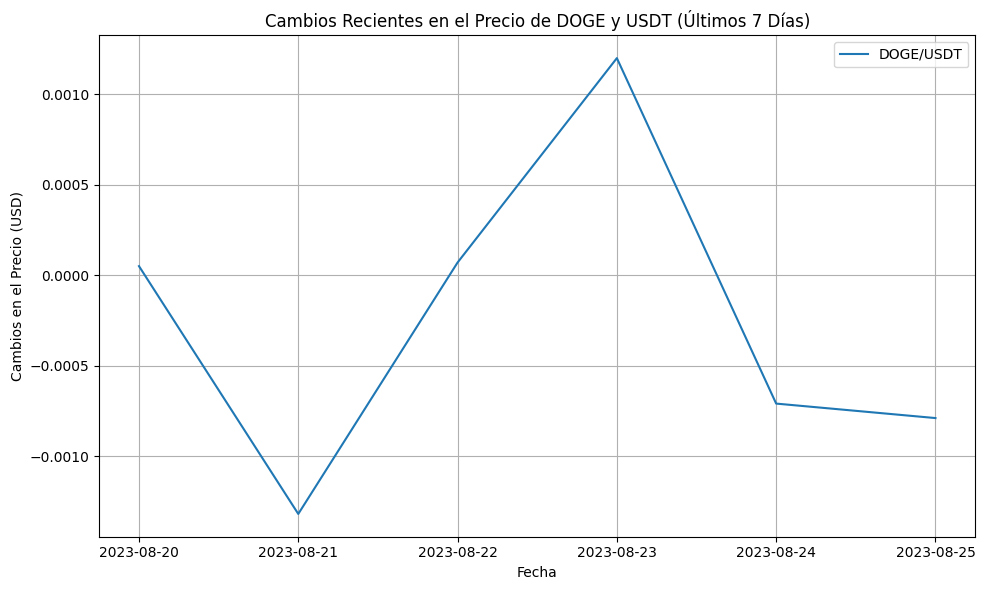

In [24]:
# Crear una instancia del intercambio (Exchange)
exchange = ccxt.binance()  # Puedes cambiar a otro intercambio si lo prefieres

# Símbolos de Dogecoin (DOGE) y Tether (USDT)
symbols = ['DOGE/USDT']

# Obtener datos de precios históricos para DOGE y USDT
historical_prices = {}
for symbol in symbols:
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe='1d', limit=7)  # Obtener últimos 7 días
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    historical_prices[symbol] = df

# Calcular cambios recientes en el precio
changes = {}
for symbol, df in historical_prices.items():
    df['price_change'] = df['close'].diff()  # Calcular cambios diarios en el precio
    changes[symbol] = df['price_change']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for symbol, change in changes.items():
    plt.plot(change.index, change.values, label=symbol)

plt.xlabel('Fecha')
plt.ylabel('Cambios en el Precio (USD)')
plt.title('Cambios Recientes en el Precio de DOGE y USDT (Últimos 7 Días)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


nota :  Binance no ofrece un par de trading para Tether (USDT) frente a sí mismo (USDT/USDT) ya que USDT se considera una moneda estable con un valor fijo de 1 USD.

Por lo tanto, si deseas analizar Dogecoin (DOGE) frente a Tether (USDT), el par sería "DOGE/USDT". 

##### Distribución de Cambios Porcentuales Diarios:

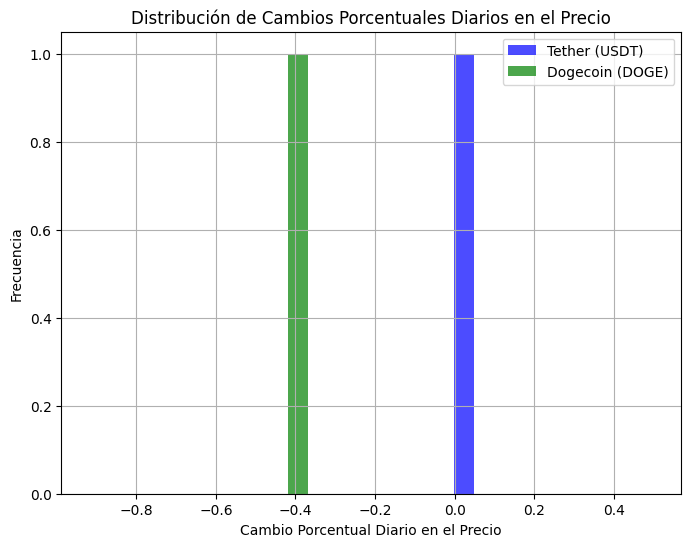

In [9]:
# Obtener datos de mercado de CoinGecko
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "ids": "tether,dogecoin",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
}
response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Crear una figura y ejes para el gráfico
plt.figure(figsize=(8, 6))

# Crear un histograma con los cambios porcentuales diarios para Tether
plt.hist(df['price_change_percentage_24h'][df['id'] == 'tether'], bins=20, alpha=0.7, color='blue', label='Tether (USDT)')

# Crear un histograma con los cambios porcentuales diarios para Dogecoin
plt.hist(df['price_change_percentage_24h'][df['id'] == 'dogecoin'], bins=20, alpha=0.7, color='green', label='Dogecoin (DOGE)')

# Personalizar el gráfico
plt.xlabel('Cambio Porcentual Diario en el Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cambios Porcentuales Diarios en el Precio')
plt.legend()
plt.grid(True)

# Mostrar el histograma
plt.show()

Nota : Distribución de Cambios porcentuales: Utiliza un histograma para mostrar cómo se distribuyen los cambios porcentuales diarios en el precio de Tether y Dogecoin.

##### Correlacion entre precios de las monedas en analisis

la correlación entre Tether (USDT) y Dogecoin (DOGE) no se puede calcular de la misma manera que entre Bitcoin (BTC) y Ethereum (ETH) debido a que Tether es una moneda estable cuyo valor se mantiene cercano a 1 USD. Por lo tanto, su precio no fluctúa de la misma manera que las criptomonedas volátiles como BTC, ETH, o DOGE.

La correlación se basa en las fluctuaciones de los precios, y en el caso de Tether (USDT), su precio está diseñado para ser estable. Por lo tanto, la correlación entre USDT y cualquier otra criptomoneda suele ser muy cercana a 0, ya que no hay cambios significativos en el precio de USDT.

##### Análisis de Tendencia en el Precio de Tether y Dogecoin


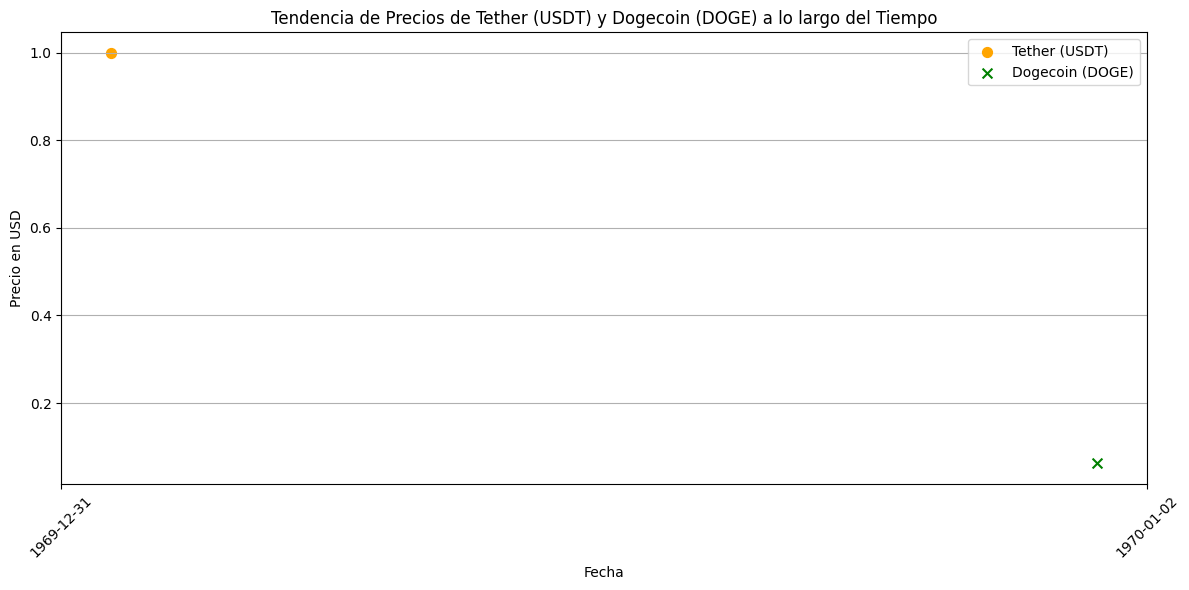

In [10]:
# Crear una figura y ejes para el gráfico de tendencia
plt.figure(figsize=(12, 6))

# Obtener los datos de Tether (USDT) y Dogecoin (DOGE)
usdt_data = df[df['id'] == 'tether']
dogecoin_data = df[df['id'] == 'dogecoin']

# Formatear las fechas en el eje x
date_fmt = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Espaciado de 7 días

# Graficar el precio de Tether(USDT) a lo largo del tiempo en naranja
plt.scatter(usdt_data['last_updated'], usdt_data['current_price'], label='Tether (USDT)', color='orange', s=50, marker='o')

# Graficar el precio de Dogecoin (DOGE) a lo largo del tiempo en verde
plt.scatter(dogecoin_data['last_updated'], dogecoin_data['current_price'], label='Dogecoin (DOGE)', color='green', s=50, marker='x')

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.title('Tendencia de Precios de Tether (USDT) y Dogecoin (DOGE) a lo largo del Tiempo')
plt.legend()
plt.grid(True)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Identificación de Picos y Valles: Utiliza gráficos de líneas para identificar picos y valles en el precio de USDt y DOGE

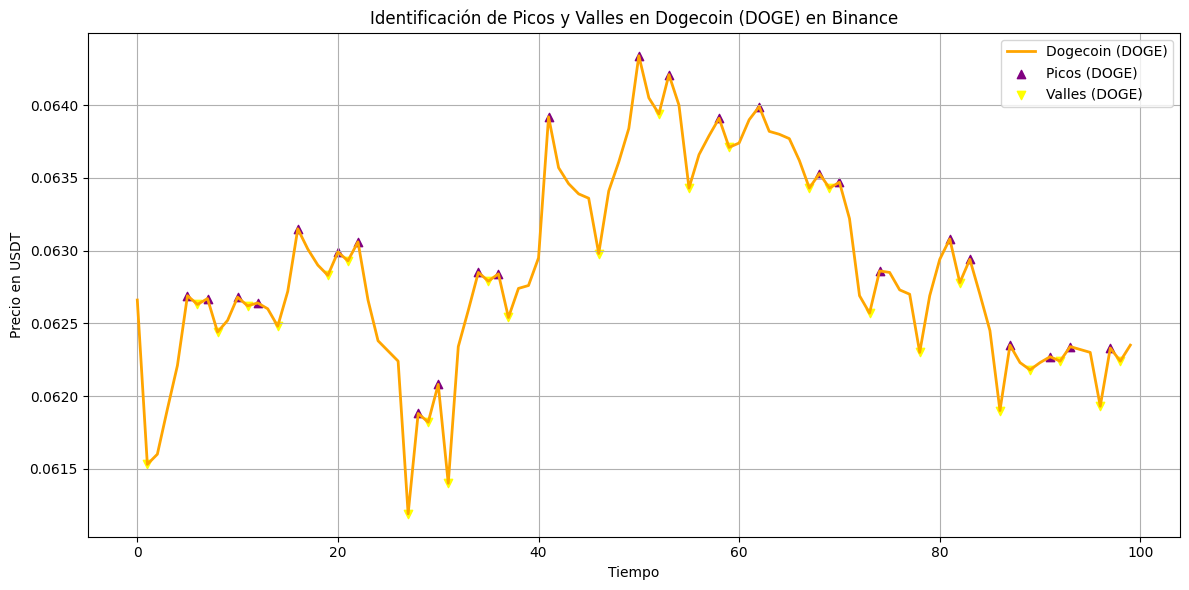

In [2]:
# Crear una instancia del intercambio (exchange)
exchange = ccxt.binance()

# Definir el par de negociación (DOGE/USDT)
symbol_doge = 'DOGE/USDT'

# Obtener datos de precios históricos (por ejemplo, las últimas 100 velas de 1 hora)
limit = 100
ohlcv_doge = exchange.fetch_ohlcv(symbol_doge, timeframe='1h', limit=limit)

# Extraer precios de cierre
prices_doge = [candle[4] for candle in ohlcv_doge]

# Crear una figura y ejes para el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar el precio de Dogecoin (DOGE) a lo largo del tiempo en naranja
plt.plot(prices_doge, label='Dogecoin (DOGE)', color='orange', linewidth=2)

# Identificar picos y valles
peak_indices_doge = [i for i in range(1, len(prices_doge)-1) if prices_doge[i] > prices_doge[i-1] and prices_doge[i] > prices_doge[i+1]]
valley_indices_doge = [i for i in range(1, len(prices_doge)-1) if prices_doge[i] < prices_doge[i-1] and prices_doge[i] < prices_doge[i+1]]

# Graficar picos y valles
plt.scatter(peak_indices_doge, [prices_doge[i] for i in peak_indices_doge], color='purple', marker='^', label='Picos (DOGE)')
plt.scatter(valley_indices_doge, [prices_doge[i] for i in valley_indices_doge], color='yellow', marker='v', label='Valles (DOGE)')

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Precio en USDT')
plt.title('Identificación de Picos y Valles en Dogecoin (DOGE) en Binance')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


KPI: Capitalización de Mercado Total
Descripción: Este KPI representa la capitalización de mercado total de todas las criptomonedas en estudio. Es una medida de la valoración total del mercado de criptomonedas y puede ayudar a identificar tendencias generales.

In [11]:
# URL de la fuente de datos
url = "https://api.coingecko.com/api/v3/coins/markets"

# Parámetros de la solicitud
params = {
    "vs_currency": "usd",  # Puedes cambiar a otra moneda si lo deseas
    "ids": "tether,dogecoin",  # USDT y DOGE
    "order": "market_cap_desc",  # Ordenar por capitalización de mercado descendente
    "per_page": 5,  # Las 5 principales monedas (puedes cambiar esto)
    "page": 1,
    "sparkline": "false",  # No necesitamos la información detallada
}

# Realizar la solicitud a la API
response = requests.get(url, params=params)
data = response.json()

# Calcular la Capitalización de Mercado Total
market_cap_total = sum([entry["market_cap"] for entry in data])

# Imprimir el resultado
print(f"Capitalización de Mercado Total: ${market_cap_total}")

Capitalización de Mercado Total: $91580216352


KPI: Volumen de Operaciones Total
Descripción: Este KPI muestra el volumen total de operaciones de todas las criptomonedas en tu conjunto de datos. Es una medida de la liquidez del mercado.

In [12]:
# URL de la fuente de datos
url = "https://api.coingecko.com/api/v3/coins/markets"

# Parámetros de la solicitud
params = {
    "vs_currency": "usd",  # Puedes cambiar a otra moneda si lo deseas
    "ids": "tether,dogecoin",  # USDT y DOGE
    "order": "market_cap_desc",  # Ordenar por capitalización de mercado descendente
    "per_page": 5,  # Las 5 principales monedas (puedes cambiar esto)
    "page": 1,
    "sparkline": "false",  # No necesitamos la información detallada
}

# Realizar la solicitud a la API
response = requests.get(url, params=params)
data = response.json()

# Calcular el Volumen de Operaciones Total
total_volume_btc = sum([entry["total_volume"] for entry in data if entry["id"] == "tether"])
total_volume_eth = sum([entry["total_volume"] for entry in data if entry["id"] == "dogecoin"])

# Imprimir los resultados
print(f"Volumen de Operaciones Total de USDT: ${total_volume_btc:.2f}")
print(f"Volumen de Operaciones Total de DOGE: ${total_volume_eth:.2f}")

Volumen de Operaciones Total de USDT: $11471347586.00
Volumen de Operaciones Total de DOGE: $232002994.00
